# Dataset 1: scikit-learn Iris data

Requirements: (70 points)

1. Visualizing the Iris dataset:

Visualizing the relationship between Sepal and target classes.
Visualizing the relationship between Petal and target classes.
2. For Iris Sepal features, modeling SVM classifier with kernels of linear, RBF, and polynomial with degree=3.

3. Visualizing the above SVM classifiers with Iris Sepal features.

4. Calculating the accuracy scores of predicting Iris Sepal features with above SVM classifiers.

5. Model Selection 1:
Using 10-fold cross validation (CV) to tune the number of neighbors or KNN (import KNeighborsClassifier); and find the best accuracy.

6. Model Selection 2:
Using 10-fold cross validation (CV) to find the mean of the accuracies from Gaussian Naïve Bayes.

7. Visualizing and analyzing the above models to conclude the optimal one and explain the reason.

In [1]:
# standard imports:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:

iris = load_iris()
print(iris.feature_names)
print(iris.target_names)
print(iris.data.shape)
print(iris.target_names[0])
data=pd.DataFrame(iris['data'],columns=["Sepal Length","Sepal Width","Petal Length","Petal Width"])
data['Species']=iris['target']
#data['Species']=data['Species'].apply(lambda x: iris['target_names'][x])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
(150, 4)
setosa


In [3]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>

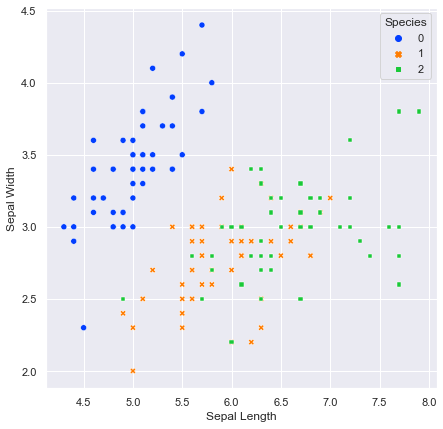

In [4]:
# 1.Visualizing the relationship between Sepal and target classes.
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=data, x="Sepal Length", y="Sepal Width", hue="Species", style="Species",palette='bright')

<AxesSubplot:xlabel='Petal Length', ylabel='Petal Width'>

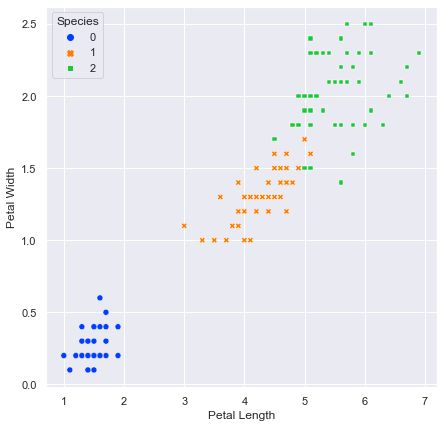

In [5]:
# 1.Visualizing the relationship between Petal and target classes.
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=data, x="Petal Length", y="Petal Width", hue="Species", style="Species",palette='bright')

In [6]:
#2. For Iris Sepal features, modeling SVM classifier with kernels of linear, RBF, and polynomial with degree=3.
X = iris.data[:, :2]
y = iris.target
feature_names = iris.feature_names[:2]
classes = iris.target_names
C = 1.0

model_svc = SVC(kernel='linear', C=C)
rbf_svc = SVC(kernel='rbf', gamma=0.7, C=C)
poly_svc = SVC(kernel='poly',gamma='auto', degree=3, C=C)

In [7]:

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #print(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

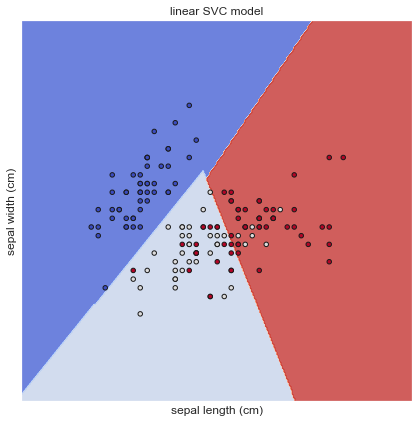

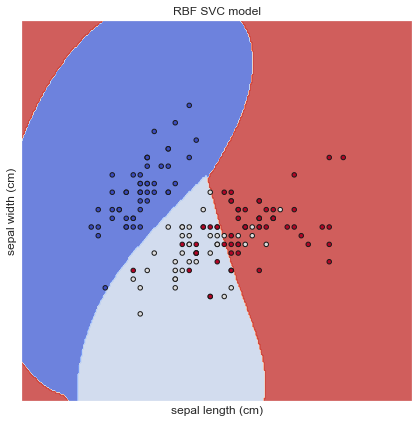

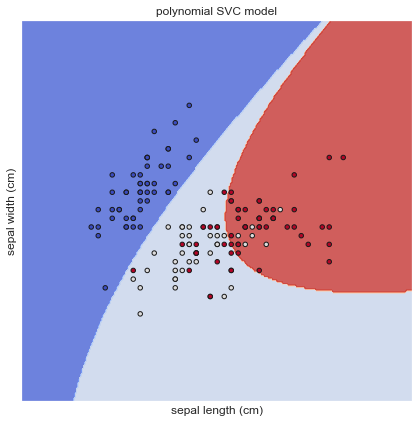

In [8]:
#3. Visualizing the above SVM classifiers with Iris Sepal features.

# linear SVC model
clf = model_svc.fit(X, y)
fig, ax = plt.subplots(figsize=(7,7))
title = ('linear SVC model')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_ylabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# RBF SVC model
clf = rbf_svc.fit(X, y)
fig, ax = plt.subplots(figsize=(7,7))
title = ('RBF SVC model')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_ylabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

# polynomial SVC model
clf = poly_svc.fit(X, y)
fig, ax = plt.subplots(figsize=(7,7))
title = ('polynomial SVC model')
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel("{}".format(feature_names[0]))
ax.set_ylabel("{}".format(feature_names[1]))
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()

In [9]:
X_train_sepal, X_test_sepal, y_train_sepal, y_test_sepal = train_test_split(X,y,test_size=0.3,random_state=0)
print("training: ", len(X_train_sepal))
print("testing: ", len(X_test_sepal))

sc = StandardScaler()
X_train_sepal_std = sc.fit_transform(X_train_sepal)
X_test_sepal_std = sc.transform(X_test_sepal)

training:  105
testing:  45


In [10]:
#4. Calculating the accuracy scores of predicting Iris Sepal features with above SVM classifiers.

#linear
C_param_range = [0.01,0.1,1,10,100]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    svm_linear =  SVC(kernel = 'linear', C = i)
    svm_linear.fit(X_train_sepal_std,y_train_sepal)
    y_pred_sepal = svm_linear.predict(X_test_sepal_std)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   C_parameter  Accuracy
0         0.01       0.6
1         0.10  0.777778
2         1.00       0.8
3        10.00       0.8
4       100.00       0.8


In [11]:
#4. Calculating the accuracy scores of predicting Iris Sepal features with above SVM classifiers.

#linear
C_param_range = [0.01,0.1,1,10,100,1000000]
sepal_acc_table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
sepal_acc_table['C_parameter'] = C_param_range

j = 0
for i in C_param_range:
    svm_linear =  SVC(kernel = 'linear', C = i)
    svm_linear.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = svm_linear.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   C_parameter  Accuracy
0         0.01       0.6
1         0.10       0.8
2         1.00       0.8
3        10.00       0.8
4       100.00       0.8
5   1000000.00  0.822222


In [12]:
#RBF

gamma_param_range = [0.0001,0.01,0.1,1,10,100]
sepal_acc_table = pd.DataFrame(columns = ['gamma_parameter','Accuracy'])
sepal_acc_table['gamma_parameter'] = gamma_param_range

j = 0
for i in gamma_param_range:
    svm_rbf =  SVC(kernel='rbf', gamma=i, C=1)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   gamma_parameter  Accuracy
0           0.0001  0.244444
1           0.0100  0.644444
2           0.1000       0.8
3           1.0000  0.777778
4          10.0000  0.666667
5         100.0000  0.466667


In [13]:
#RBF

c_param_range = [0.0001,0.01,0.1,1,10,100,10000]
sepal_acc_table = pd.DataFrame(columns = ['c_parameter','Accuracy'])
sepal_acc_table['c_parameter'] = c_param_range

j = 0
for i in c_param_range:
    svm_rbf =  SVC(kernel='rbf', gamma='auto', C=i)
    svm_rbf.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   c_parameter  Accuracy
0       0.0001  0.244444
1       0.0100  0.244444
2       0.1000  0.688889
3       1.0000       0.8
4      10.0000  0.777778
5     100.0000  0.733333
6   10000.0000  0.666667


In [14]:
#RBF

gamma_param_range = [0.0001,0.01,0.1,1,2,3,4,10]
sepal_acc_table = pd.DataFrame(columns = ['gamma_parameter','Accuracy'])
sepal_acc_table['gamma_parameter'] = gamma_param_range

j = 0
for i in gamma_param_range:
    svm_rbf =  SVC(kernel='rbf', degree=i, C=1)
    svm_rbf.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   gamma_parameter Accuracy
0           0.0001      0.8
1           0.0100      0.8
2           0.1000      0.8
3           1.0000      0.8
4           2.0000      0.8
5           3.0000      0.8
6           4.0000      0.8
7          10.0000      0.8


In [15]:
#poly

gamma_param_range = [0.0001,0.01,0.1,1,10,100]
sepal_acc_table = pd.DataFrame(columns = ['gamma_parameter','Accuracy'])
sepal_acc_table['gamma_parameter'] = gamma_param_range

j = 0
for i in gamma_param_range:
    svm_rbf =  SVC(kernel='poly',gamma=i, degree=3, C=1)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   gamma_parameter  Accuracy
0           0.0001  0.244444
1           0.0100  0.244444
2           0.1000  0.355556
3           1.0000  0.688889
4          10.0000  0.711111
5         100.0000  0.688889


In [16]:
#poly

gamma_param_range = [0.0001,0.01,0.1,1,10,100]
sepal_acc_table = pd.DataFrame(columns = ['gamma_parameter','Accuracy'])
sepal_acc_table['gamma_parameter'] = gamma_param_range

j = 0
for i in gamma_param_range:
    svm_rbf =  SVC(kernel='poly',gamma=i, degree=3, C=1)
    svm_rbf.fit(X_train_sepal,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)

   gamma_parameter  Accuracy
0           0.0001  0.244444
1           0.0100  0.488889
2           0.1000       0.8
3           1.0000  0.777778
4          10.0000  0.711111
5         100.0000       0.8


In [17]:
'''
#poly

degree_param_range = [1,2,3,4]
sepal_acc_table = pd.DataFrame(columns = ['degree_parameter','Accuracy'])
sepal_acc_table['degree_parameter'] = C_param_range

j = 0
for i in C_param_range:
    svm_rbf =  SVC(kernel='poly',gamma='auto', degree=i, C=1)
    svm_rbf.fit(X_train_sepal_std,y_train_sepal)
    y_pred_sepal = svm_rbf.predict(X_test_sepal_std)
    sepal_acc_table.iloc[j,1] = accuracy_score(y_test_sepal,y_pred_sepal)
    j += 1    
print(sepal_acc_table)
'''
print("poly with degree as variable")

poly with degree as variable


In [18]:
#5. Model Selection 1:
#Using 10-fold cross validation (CV) to tune the number of neighbors or KNN (import KNeighborsClassifier); and find the best accuracy.

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=6)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9736842105263158

In [19]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)
print("The best accuracy :%d"  %max(scores))

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]
The best accuracy :1


In [20]:
print("The best accuracy : In the first iteration the accuracy is 100%")

The best accuracy : In the first iteration the accuracy is 100%


In [21]:
#6. Model Selection 2:
#Using 10-fold cross validation (CV) to find the mean of the accuracies from Gaussian Naïve Bayes.

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_1 = gnb.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_1))

0.9210526315789473


In [22]:
#mean of the accuracies from Gaussian Naïve Bayes.
gnb_new = GaussianNB()
scores = cross_val_score(gnb_new, X, y, cv=10, scoring='accuracy').mean()
print(scores)

0.9533333333333334


0.9736842105263158


Text(0, 0.5, 'Testing Accuracy')

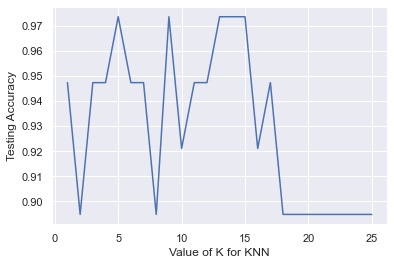

In [23]:
#7. Visualizing and analyzing the above models to conclude the optimal one and explain the reason.
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(max(scores))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
#print(metrics.confusion_matrix(y_test, y_pred))

In [24]:
#7. Visualizing and analyzing the above models to conclude the optimal one and explain the reason.


In [25]:
# log
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
log1 = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
formatted_string = "{:.4f}".format(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())
print(formatted_string)

0.9733


In [26]:
# Gaussian Naïve Bayes.
from sklearn.linear_model import LinearRegression
gnb = GaussianNB()
gnb1=cross_val_score(gnb, X, y, cv=10, scoring='accuracy')
formatted_string = "{:.4f}".format(cross_val_score(gnb, X, y, cv=10, scoring='accuracy').mean())
print(formatted_string)

0.9533


In [27]:
# KNN
knn = KNeighborsClassifier(n_neighbors=20)
knn1 = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
formatted_string = "{:.4f}".format(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())
print(formatted_string)

0.9800


In [28]:
#RBF
gpc = SVC(kernel='rbf', gamma=0.7, C=1)
rbf1 = cross_val_score(gpc, X, y, cv=10, scoring='accuracy')
formatted_string = "{:.4f}".format(cross_val_score(gpc, X, y, cv=10, scoring='accuracy').mean())
print(formatted_string)

0.9733


In [29]:
#poly
from sklearn.preprocessing import PolynomialFeatures
poly = SVC(kernel='poly',gamma='auto', degree=3, C=1)
poly1 = cross_val_score(poly, X, y, cv=10, scoring='accuracy')
formatted_string = "{:.4f}".format(cross_val_score(poly, X, y, cv=10, scoring='accuracy').mean())
print(formatted_string)

0.9733


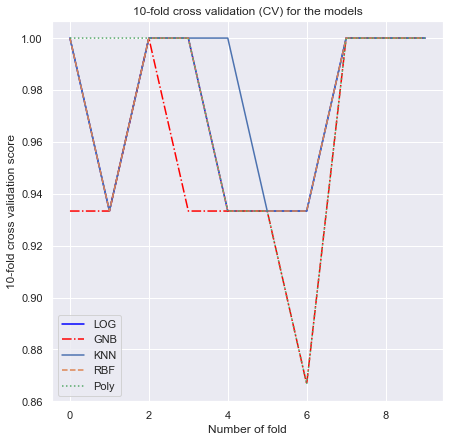

In [30]:
fig, ax = plt.subplots(figsize=(7,7))
title = ('10-fold cross validation (CV) for the models')
datal=np.array(log1)
datag=np.array(gnb1)
datak=np.array(knn1)
datar=np.array(rbf1)
datap=np.array(poly1)
ax.plot(datal, color="blue", label="LOG", linestyle="-") 
ax.plot(datag,color="red", label="GNB", linestyle="-.") 
ax.plot(datak, label="KNN", linestyle="solid") 
ax.plot(datar, label="RBF", linestyle="dashed") 
ax.plot(datap, label="Poly", linestyle="dotted")
ax.legend()
ax.set(xlabel='Number of fold', ylabel='10-fold cross validation score')
ax.set_title(title)
plt.show()

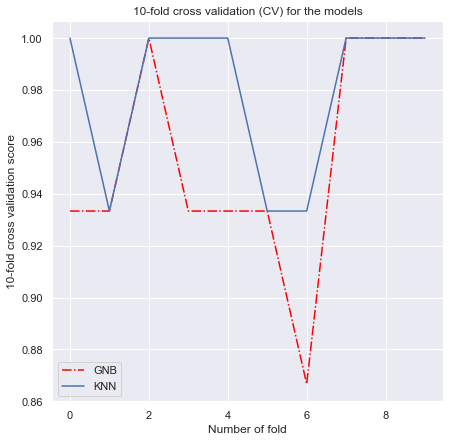

In [31]:
fig, ax = plt.subplots(figsize=(7,7))
title = ('10-fold cross validation (CV) for the models')
ax.plot(datag, color="red", label="GNB", linestyle="-.") 
ax.plot(datak, label="KNN", linestyle="solid")
ax.legend()
ax.set(xlabel='Number of fold', ylabel='10-fold cross validation score')
ax.set_title(title)
plt.show()

In [32]:
print("From above results we can models to conclude the optimal one is from KNN. ")

From above results we can models to conclude the optimal one is from KNN. 


# Dataset 2:  

Goal: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

Requirements: (30 points)

1. Using 10-fold cross-validation with the features of media with and without “Newspaper”.

2. Calculating the average MSE score with and without “Newspaper”.

3. Analyzing the MSE scores from the two models and explaining.

In [33]:
# 1.Using 10-fold cross-validation with the features of media with and without “Newspaper”.

In [34]:
data = pd.read_csv('Advertising.csv', index_col=0)
df = pd.DataFrame(data=data)

In [35]:
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [36]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [37]:
feature_col1 = ['TV', 'Radio', 'Newspaper']
feature_col2 = ['TV', 'Radio']
X1 = data[feature_col1]
X2 = data[feature_col2]
y = data.Sales
lin = LinearRegression()

In [38]:
from sklearn.metrics import mean_squared_error
scores1 = cross_val_score(lin, X1, y, cv=10, scoring='neg_mean_squared_error')
scores2 = cross_val_score(lin, X2, y, cv=10, scoring='neg_mean_squared_error')

In [39]:
formatted_string = "{:.4f}".format(cross_val_score(lin, X1, y, cv=10, scoring='neg_mean_squared_error').mean())
print(formatted_string)

-3.0600


In [40]:
mse_scores1 = -scores1
print(mse_scores1)
mse_scores2 = -scores2
print(mse_scores2)

[3.56038438 3.29767522 2.08943356 2.82474283 1.3027754  1.74163618
 8.17338214 2.11409746 3.04273109 2.45281793]
[3.38264572 3.28736055 2.09185507 2.81784389 1.27311083 1.74391853
 8.0006111  2.07650936 3.03635301 2.4289835 ]


In [41]:
#2.Calculating the average MSE score with and without “Newspaper”.

print("Average MSE score with Newspaper: %.4f" %mse_scores1.mean())
print("Average MSE score without Newspaper: %.4f" %mse_scores2.mean())

Average MSE score with Newspaper: 3.0600
Average MSE score without Newspaper: 3.0139


In [42]:
#3.Analyzing the MSE scores from the two models and explaining.

### "Mean square error (MSE) is used to determine the model's performance. The larger the number the larger the error."

We can infer from the above data that the model excluding Newspaper has lesser MSE compared with model including Newspaper.
So, the model excluding Newspaper is a better model.